# Практическая работа №2: Классические методы математической статистики
Выполнила студентка гр. 1375 Суровяткина Ксения. Вариант №26

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа; 
сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения
* **Функция правдоподобия** $\mathrm{L} : \mathcal{X} \times \Theta \rightarrow (0, +\infty):$

 $$\mathrm{L}\left(\vec{X}, \theta \right) = \prod \limits_{i = 1}^n p_{\theta}(x_i)$$
где $p_{\theta}(x)$ - плотность распределения

* Оценка $\widehat{\theta}\left(\vec{X}\right)$, максимизирующая функцию правдоподобия $\mathrm{L}\left(\vec{X}, \theta \right)$ по $\theta$ при каждом фиксированном $x$:
$$\mathrm{L}\left(\vec{X}, \widehat{\theta}\left(\vec{X}\right)\right) \geq \mathrm{L}\left(\vec{X}, \widetilde{\theta}\left(\vec{X}\right)\right), \forall x \in \mathcal{X}, \forall  \widetilde{\theta}\left(\vec{X}\right)$$
называется **оценкой максимального прадоподобия (ОМП)**


* Пусть $X_1, \ldots, X_n$ - выборка из распределения $p_{\theta}$ ; $\vec{\theta} = \left(\theta_1, \ldots, \theta_d \right)$ ; существует $\mu_k\left(\theta\right) = \mathbb{E}_{\theta}x_1^k, k = 1, \ldots, d$

Если существует единственное решение $\widetilde{\theta}\left(\vec{X}\right)$ системы уравнений
$$\widehat{\mu_k}\left(\widetilde{\theta}\right) = \mu_k\left(\widetilde{\theta}\right), k = \overline{1, d}$$
где $\widehat{\mu_k}\left(\widetilde{\theta}\right) = \frac{1}{n}\sum \limits_{i = 1}^n x_i^k$ - выборочный момент k-ого порядка, то $\widetilde{\theta}\left(\vec{X}\right)$ называется **оценкой по методу моментов (ОММ)**

* Оценка $\widehat{\theta}\left(X\right)$ параметра $\theta$ называется **несмещённой**, если при каждом значении параметра $\theta \in \Theta$
$$\mathbb{E}_{\theta}\widehat{\theta}\left(X\right) = \theta$$

* Статистика $\widehat{\Theta} : \mathcal{X} \rightarrow \mathcal{Y}$ , удовлетворяющая условию:
$$\mathbb{P}_{\theta}\left(\widehat{\Theta} \ni \theta\right) \geq 1 - \alpha$$ 
называется **доверительной оценкой** парамаетра $\theta$ уровня доверия $1 - \alpha$.

* Статистика $\widehat{\Theta} : \mathcal{X} \rightarrow \mathbb{R}^2$, удовлетворяющая условию
$$\mathbb{P}_{\theta}\left(\left[T_1\left(\vec{X}\right), T_2\left(\vec{X}\right)\right] \ni \theta\right) \geq 1 - \alpha, \forall \theta \in \Theta$$
назвается **доверительным интервалом** параметра $\theta$ уровня доверия $1 - \alpha$.

* Статистика $\widehat{\Theta_n}$ вида $\widehat{\Theta_n} = \left[T_{1n}\left(\vec{X}\right), T_{2n}\left(\vec{X}\right)\right]$ (определённая прикаждом $n \in \mathbb{N}$), удовлетворяющая условию
$$\lim _{n \to \infty } \mathbb{P}_{\theta} \left(\left[T_{1n}\left(\vec{X}\right), T_{2n}\left(\vec{X}\right)\right] \ni \theta \right) \geq 1 - \alpha, \forall \theta \ni \Theta$$
называется **асимптотическим доверительным интервалом** параметра $\theta$ уровня доверия $1 - \alpha$.

* **Простая гипотеза** - одноточечная гипотеза, определяющая точное значение параметра:
$$H: \theta = \theta^*$$

* **Сложная гипотеза** - гипотеза, состоящая из конечного или бесконечного числа простых гипотез.

* **Доверительная область:** $\{x \in \mathcal{X}| \phi\left(x\right) = 0\}$

* **Критическая область:** $\{x \in \mathcal{X}| \phi\left(x\right) = 1\}$ 

* **Область сомнения:** $\{x \in \mathcal{X}| \phi(x) \in (0, 1)\}$

* **Нерандомизированный критерий**, если результаты наблюдений одзнозначно определяют решение:
$$\phi: \mathcal{X} \rightarrow \{0,1\}$$

* **Статистика отношения правдоподобия:** $\mathrm{LR}\left(X, \theta_1, \theta_0\right) = \frac{\mathrm{L}\left(X, \theta_1\right)}{\mathrm{L}\left(X, \theta_0\right)}$

* **Лемма Неймана-Пирсона:** существует более мощный критерий уровня значимости $\alpha$ вида:
$$\phi(x) =\left\{\begin{array}{l} 1, \mathrm{LR} > c \\ \mathrm{LR} = c  \\ 0, \mathrm{LR} < c \\ \end{array}\right.$$
где константа $c$ и вероятность $p \in [0,1]$ определяются из уравнения: $\mathbb{E}_{\theta_0}\phi(x) = \mathbb{P}_{\theta_0}\left(\mathrm{LR}(x)>c\right) + p \cdot \mathbb{P}_{\theta_0}\left(\mathrm{LR}(x)=c\right) = \alpha$


## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Задание 1
### a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

In [479]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat
import math
from scipy.stats import chi2, norm, kstest, kstwobign, laplace, t, poisson, geom

data_1 = [2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 3, 0, 2, 2, 2, 1, 2, 1, 1, 3, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
n = len(data_1)

In [480]:
#вариационный ряд

def variation(data):
    data.sort()
    data = [str(i) for i in data]
    return ','.join(data)

print( "Вариационный ряд:", variation(data_1))

#print(data.count(0)/n) #частота
#print(data.count(1)/n)
#print(data.count(2)/n)
#print(data.count(3)/n)

Вариационный ряд: 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3


Таким образом, вариационный ряд:
 $$\vec{X}^\prime = \left(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3 \right)$$

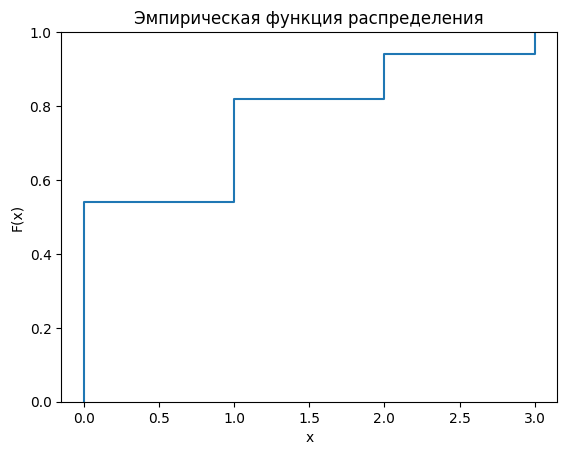

In [481]:
def F(x): #эмпирическая функция распределения P(X < x)
    sum_i = 0
    for item in data_1:
        if item < x:
            sum_i += 1 #сумма индикаторов
    return sum_i/n

sns.ecdfplot(data_1) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

| $x_i$  | 0    | 1    | 2    | 3    |
|-------|------|------|------|------|
|$n_i$   | 27   | 14   | 6    | 3    |
| $\frac{n_i}{n}$ | 0.54 | 0.28 | 0.12 | 0.06 |

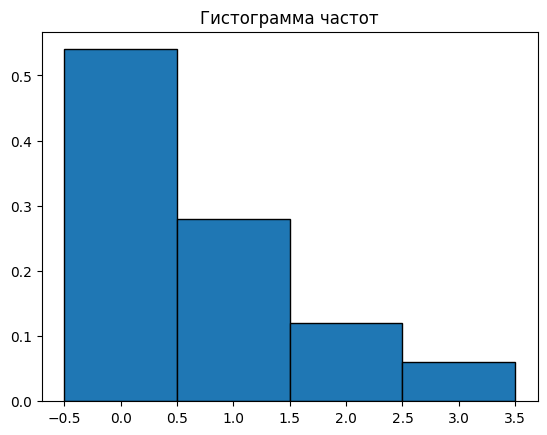

In [482]:
#гистограмма частот

hist = plt.hist(data_1, edgecolor='black', bins=4, weights=np.ones_like (data_1) / n, range=(min(data_1)-0.5, max(data_1)+0.5))
plt.title('Гистограмма частот');

### 1.b Вычислить выборочные аналоги следующих числовых характеристик:

In [483]:
#Математическое ожидание

sum_= 0
for item in data_1:
    sum_ += item #сумма Х
mn = sum_/n
print("Выборочное среднее: ", mn)

Выборочное среднее:  0.7


Получаем выборочный аналог математического ожидания - выборочное среднее:
$$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 0.7$$

In [484]:
#Выборочный аналог дисперсии и СКО

dif=[]
for item in data_1:
    dif.append((item - mn)**2) #массив  с (X_i-X_cp)^2
S = round(sum(dif)/n, 2)

s = S**0.5 #выборочное СКО

print("Выборочная дисперсия: ", S)
print("Выборочное СКО: ", s)

Выборочная дисперсия:  0.81
Выборочное СКО:  0.9


Получаем выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО: 
$$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=0.81$$ 
$$S=\sqrt{S^2}=0.9$$

In [485]:
#Выборочная медиана

med = stat.median(data_1)
print("Выборочная медиана: ", med)
print('X_25 =', data_1[24], '; X_26 =', data_1[25])

Выборочная медиана:  0.0
X_25 = 0 ; X_26 = 0


Выборочная медиана: <br><br>
$$np = 50\cdot\frac{1}{2}=25\in \mathbb Z \Rightarrow \large z_{50,\frac{1}{2}} = \normalsize \left[ X_{(25)},X_{(26)} \right) = \left[0,0\right) = 0$$

In [486]:
#Выборочная асимметрия

dif=[]
for item in data_1:
    dif.append((item - mn)**3) #массив  с (X_i-X_cp)^3
skew_X = round(sum(dif)/(n*s**3), 3)
print("Выборочный коэффициент асимметрии: ", skew_X)

Выборочный коэффициент асимметрии:  1.119


Выборочный коэффициент асимметрии: 
$$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 1.119$$

In [487]:
#Выборочный эксцесс

dif=[]
for item in data_1:
    dif.append((item - mn)**4) ##массив  с (X_i-X_cp)^4
kurt_X = round(sum(dif)/(n*s**4) - 3, 3)
print("Выборочный коэффициент эксцесса: ", kurt_X)

Выборочный коэффициент эксцесса:  0.283


Выборочный коэффициент эксцесса:
$$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = 0.283$$

In [488]:
a, b = 0, 0.87
print('F(a) =', F(a))
print('F(b) =', F(b))
print("Выборочный аналог P(a <= x <= b): ", F(b) - F(a))

F(a) = 0.0
F(b) = 0.54
Выборочный аналог P(a <= x <= b):  0.54


Выборочный аналог $\mathbb{P}\left(x \in \left[a, b\right]\right)$, a = 0.00, b = 0.87: <br><br>

$$\mathbb{P}\left(x \in \left[a, b\right]\right) = \mathrm{F}(b) - \mathrm{F}(a) = 0.54 - 0 = 0.54$$
 где $\mathrm{F}(x)$ - эмпирическая функция распределения

### 1.c В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок. <br><br>

**Плотность распределения пуассона**: 
$$\large q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$$

***Оценка максимального правдоподобия:***<br><br>
$ L\left(\vec{X}, \theta \right) =\prod\limits_{i = 1}^nq_{\theta}\left(\normalsize x_i\right)=\prod\limits_{i = 1}^n\frac{\lambda^x_i}{x_i!}e^{-\lambda} = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$ <br><br>

$LL\left(\vec{X}, \theta \right) = \sum \limits_{i=1}^{n}x_i \cdot \ln{\lambda} - n\lambda + \ln{\left(\prod\limits_{i = 1}^n\frac{1}{\large x_i!}\right)}$ <br><br>

$\Large \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} \normalsize - n = 0 \Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ - ОМП <br><br>

$\large \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot \normalsize n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка. <br><br>

***Оценка методом моментов:***<br><br>
$\mathbb{E}X_1 = \lambda$ - математическое ожидание (теоретический первый момент)<br><br> 
$\mathrm{M_1} = \overline{X}$ - выборочное среднее (выборочный первый момент)<br><br>
Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$<br><br>

$\large \mathbb{E}_{\theta}\widetilde{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot \normalsize n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.


### 1.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1 = 0.20$ для параметра $\lambda$ на базе оценки максимального правдоподобия. <br>
 **Плотность распределения пуассона**: 
$$\large q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$$

* Построение АДИ на базе ОМП:

Из пункта 1.с:<br>

$\widehat{\theta} = \widehat{\lambda} = \overline{X}$<br>

$\Large \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} \normalsize - n$<br>

$\Large \frac{\partial^2 LL}{\partial \lambda^2} = \normalsize - \Large \frac{\sum \limits_{i=1}^{n}x_i}{\lambda^2}$<br>

$\mathrm{I}_n(\lambda) = - \large \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta} \left(\frac{\sum \limits_{i=1}^{n}x_i}{\lambda^2}\right) = \frac{1}{\lambda^2}\sum \limits_{i=1}^{n}\mathbb{E}_{\theta}x_i = \frac{1}{\lambda^2} \cdot n \cdot \lambda = \Large \frac{n}{\lambda}$ <br>

$\mathrm{I}(\lambda) = \lim \limits_{n \to \infty} \large \frac{1}{\lambda} = \frac{1}{\lambda}$ <br>

**Квантили:** 

Так как распределение симметричное: <br><br>
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.2}{2} = 0.9$, где $\alpha = \alpha_1 = 0.2$<br><br>
$\mathrm{\Phi}(x_{\alpha}) = 0.9 \Rightarrow x_{\alpha} = 1.29$ (посчитано в коде с использованием scipy.stats).

*Асимптотический доверительный интервал:* <br><br>
$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1 = 0.2$ для параметра $\lambda$:
$$\left[0.55,0.85\right] \ni \lambda$$

* Построение АДИ на базе асимптотически нормальной оценки параметра:

*Асимптотическая нормальность:*

$\sqrt{n}\left(\overline{X} - \lambda\right) \sim \mathcal{N}\left(0, \mathbb{D}x\right)$

Тогда получим:

$\sqrt{n}\frac{\left(\overline{X} - \lambda\right)}{\sqrt{\lambda}} \sim \mathcal{N}\left(0, 1\right)$

Так как распределение симметричное: <br><br>
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.2}{2} = 0.9$, где $\alpha = \alpha_1 = 0.2$<br><br>
$\mathrm{\Phi}(x_{\alpha}) = 0.9 \Rightarrow x_{\alpha} = 0.816$ (посчитано в коде с использованием scipy.stats).

*Асимптотический доверительный интервал:* <br><br>
(Далее будут приведены окгруглённые до двух знаков после запятой значения, посчитанные в коде)
1) $\mathbb{D}x = \lambda$. Заменим в знаменателе параметр на выборочную дисперсию:

$\mathbb{P}_{\theta}\left(-x_{\alpha} \leq \sqrt{n} \cdot \frac{\overline{X} - \lambda}{\sqrt{S^2}} \leq x_{\alpha}\right) \approx 1 - \alpha$

$\mathbb{P}_{\theta}\left(\overline{X} - \frac{S}{\sqrt{n}} \cdot x_{\alpha} \leq \lambda \leq \overline{X} + \frac{S}{\sqrt{n}} \cdot x_{\alpha}\right) \approx 1 - \alpha$

Таким образом, АДИ уровня значимости $\alpha_1 = 0.2$ для параметра $\lambda$:
$$\left[0.54,0.86\right] \ni \lambda$$

2) В знаменателе заменим параметр на $\overline{X}$:

$\mathbb{P}_{\theta}\left(-x_{\alpha} \leq \sqrt{n} \cdot \frac{\overline{X} - \lambda}{\sqrt{\overline{X}}} \leq x_{\alpha}\right) \approx 1 - \alpha$

$\mathbb{P}_{\theta}\left(\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} \leq \lambda \leq \overline{X} + \sqrt{\frac{\overline{X}}{n}}\right) \approx 1 - \alpha$

Таким образом, АДИ уровня значимости $\alpha_1 = 0.2$ для параметра $\lambda$:
$$\left[0.55,0.85\right] \ni \lambda$$

3) 
$\mathbb{P}_{\theta}\left(-x_{\alpha} \leq \sqrt{n} \cdot \frac{\overline{X} - \lambda}{\sqrt{\lambda}} \leq x_{\alpha}\right) \approx 1 - \alpha$

$\mathbb{P}_{\theta}\left(\left|\overline{X} - \lambda\right| \leq x_{\alpha} \cdot \sqrt{\frac{\lambda}{n}}\right) \approx 1 - \alpha$

Решим неравенство в скобках и получим границы интервала:
$$\left[0.6,0.8\right] \ni \lambda$$

In [489]:
x_alpha = 0
while norm.cdf(x_alpha) <= 0.9:
    x_alpha += 0.01
print('x_alpha =', x_alpha)
aci = []

left_1 = mn - x_alpha * (mn / n)**0.5 #подсчёт левой границы АДИ
aci.append(left_1)
right_1 = mn + x_alpha * (mn / n)**0.5 #подсчёт правой границы АДИ
aci.append(right_1)
print("1) Асимптотический доверительный интервал: ", aci)

left_2 = mn - (s / n**0.5) * x_alpha
right_2 =  mn + (s / n**0.5) * x_alpha
print("2) Асимптотический доверительный интервал: ", [left_2, right_2])

left_3 = mn - x_alpha * (mn / n)**0.5
right_3 = mn + x_alpha * (mn / n)**0.5
print("3) Асимптотический доверительный интервал: ", [left_3, right_3])

a = 100*50**3
b = -140*50**3-168100
c = 49*50**3
Dis = b**2 - 4 * a * c
left_4 = (-b - np.sqrt(Dis)) / (2 * a)
right_4 = (-b + Dis**0.5) / (2 * a)
print("4) Асимптотический доверительный интервал: ", [left_4, right_4])

x_alpha = 1.290000000000001
1) Асимптотический доверительный интервал:  [0.5473651415960298, 0.8526348584039701]
2) Асимптотический доверительный интервал:  [0.5358098054084836, 0.8641901945915164]
3) Асимптотический доверительный интервал:  [0.5473651415960298, 0.8526348584039701]
4) Асимптотический доверительный интервал:  [0.6094675751428216, 0.8039804248571785]


### 1.е Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 1.40$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.20$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Разобьём числовую прямую на интервалы: $G_1 = \left(- \infty, 0.5\right]$,  $G_2 = \left(0.5, 1.5\right]$,  $G_3 = \left(1.5, +\infty\right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$, где $q_{\theta}(x)$ - плотность распределения Пуассона.

$\mathbb{P}_{1} = \frac{1.4^0}{0!}e^{-1.4} = 0.25$ <br> 

$\mathbb{P}_{2} = \frac{1.4^1}{1!}e^{-1.4} = 0.35$ <br>

$\mathbb{P}_{3} = 1 - \mathbb{P}_1 - \mathbb{P}_2 = 0.4$ <br>

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 24.45$<br>
Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{2, 0.2}^2 = 3.22$ <br>

$\chi^2 > \chi_{2, 0.2}^2 \Rightarrow$ гипотезу отвергаем, так как статистика критерия попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 5.7 \cdot 10^{-15}$

In [490]:
lambda_0 = 1.4
alpha_1 = 0.2

edges = [0.5, 1.5, 3] #интервалы

#подсчёт вероятностей
p1 = poisson.cdf(edges[0], lambda_0)
p2 = poisson.cdf(edges[1], lambda_0) - poisson.cdf(edges[0], lambda_0)
p3 = 1 - p1 - p2
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)

#количество значений, попавших в интервал
groups = [[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_1:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3 = len(groups[0]), len(groups[1]), len(groups[2])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 2))

if chi > chi2.ppf(1 - alpha_1, 2):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.2
step = 0.0001
while chi > chi2.ppf(1 - alpha, 2):
    alpha -= step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.24659696394160646 , n*P1 =  12.329848197080324
P2 =  0.3452357495182492 , n*P2 =  17.26178747591246
P3 =  0.40816728654014434 , n*P3 =  20.408364327007217
n1 =  27 , n2 =  14 , n3 =  9
Статистика критерия:  24.448336321464986
Табличное значение: 3.218875824868201
Гипотеза отвергается
Наибольший уровень значимости:  5.721361969260319e-15


### 1.f Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.20$. Вычислить наибольшее значение значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Проведём группировку, как в пункте 1.е. В качестев параметра $\lambda$ возьмём его ОМП, то есть $\lambda = \overline{X} = 0.7$ 

$\mathbb{P}_{1} = \frac{\overline{X}^0}{0!}e^{-\overline{X}} = \frac{0.7^0}{0!}e^{-0.7} = 0.5$ <br> 

$\mathbb{P}_{2} = \frac{\overline{X}^1}{1!}e^{-\overline{X}} = \frac{0.7^1}{1!}e^{-0.7} = 0.35$ <br>

$\mathbb{P}_{3} = 1 - \mathbb{P}_1 - \mathbb{P}_2 = 0.15$ <br>

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 1.04$<br><br>
Из таблицы: $\chi_{k-1-r, \alpha_1}^2 = \chi_{1, 0.2}^2 = 1.64$ <br><br>
$\chi^2 > \chi_{1, 0.2}^2 \Rightarrow$ нет оснований отвергнуть гипотезу, так как статистика критерия не попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.3$

In [491]:
edges = [0.5, 1.5, 3] #интервалы

#подсчёт вероятностей
p1 = poisson.cdf(edges[0], mn)
p2 = poisson.cdf(edges[1], mn) - poisson.cdf(edges[0], mn)
p3 = 1 - p1 - p2
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)

#количество значений, попавших в интервал
groups = [[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_1:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3 = len(groups[0]), len(groups[1]), len(groups[2])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 1))

if chi > chi2.ppf(1 - alpha_1, 1):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.2
step = 0.001
while chi < chi2.ppf(1 - alpha, 1):
    alpha += step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.4965853037914095 , n*P1 =  24.829265189570478
P2 =  0.34760971265398666 , n*P2 =  17.380485632699333
P3 =  0.15580498355460382 , n*P3 =  7.790249177730191
n1 =  27 , n2 =  14 , n3 =  9
Статистика критерия:  1.0351431343497568
Табличное значение: 1.6423744151498172
Гипотеза принимается
Наибольший уровень значимости:  0.3090000000000001


### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 1.40$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 0.70$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.20$. Что получится, если поменять местами основную и альтернативную гипотезы?

*Нулевая гипотеза* $H_0: \lambda = \lambda_0 = 1.4$

*Альтернативная гипотеза* $H_1: \lambda = \lambda_1 = 0.7$

*Функция правдоподобия:*

$ L\left(\vec{X}, \theta \right) = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \lambda_0, \lambda_1\right) = \frac{\mathrm{L}\left(\vec{X}, \lambda_1\right)}{\mathrm{L}\left(\vec{X}, \lambda_0\right)} = \left(\frac{\lambda_1}{\lambda_0}\right)^{\sum \limits_{i = 1}^n x_i} \cdot \exp{\left(-n\left(\lambda_1 - \lambda_0\right)\right)}$ - монотонная функция от $\sum \limits_{i = 1}^n x_i$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_1}{\lambda_0}\right)} + n\left(\lambda_0 - \lambda_1\right) > \ln{c}$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_1}{\lambda_0}\right)} > \ln{c} - n\left(\lambda_0 - \lambda_1\right)$

Так как $\lambda_0 > \lambda_1$, то меняем знак неравенства:

$\overline{X} < \large \frac{\ln{c} - n\left(\lambda_0 - \lambda_1\right)}{n \cdot \left(\ln{\lambda_1} - \ln{\lambda_0}\right) }$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} < c^*$

$\mathrm{LR} < c \iff \overline{X} > c^*$

Тогда получим:

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} > c^*\\ \end{array}\right.$$
Используя ЦПТ, получаем эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - \mathbb{E}x}{\sqrt{\mathbb{D}}} \sim \mathcal{N}(0, 1)$ 

$\sqrt{n} \frac{\overline{X} - \lambda_0}{\sqrt{\lambda_0}}\sim \mathcal{N}(0, 1)$, при $H_0$

$\Phi\left(\sqrt{n} \frac{\overline{X} - \lambda_0}{\sqrt{\lambda_0}} \geq \sqrt{n} \frac{c^* - \lambda_0}{\sqrt{\lambda_0}}\right) =1 - \Phi\left(\sqrt{n} \frac{c^* - \lambda_0}{\sqrt{\lambda_0}}\right) = \alpha_1$

Квантиль:

$x_{\alpha} : \Phi(x_{\alpha}) = 1 - \alpha_1 = 1 - 0.2 = 0.8 \Rightarrow x_{\alpha} = 0.85$

$c^* = \frac{x_{\alpha} \sqrt{\lambda_0}}{\sqrt{n}} + \lambda_0 = 1.54$

$\overline{X} = 0.7$
$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < 1.54 \\ p, \overline{X} = 1.54 \\ 0, \overline{X} > 1.54\\ \end{array}\right.$$
Так как $\overline{X} < c^*$, то гипотеза отвергается.

In [492]:
alpha_1 = 0.2
lambda_0 = 1.4

x_alpha = 0
while norm.cdf(x_alpha) <= 0.8:
    x_alpha += 0.01
print('x_alpha =', x_alpha)

c1_star = (x_alpha * (lambda_0**0.5)) / (n**0.5) + lambda_0
print('c* =', c1_star)

print('Среднее = ', mn)

x_alpha = 0.8500000000000005
c* = 1.5422322045107928
Среднее =  0.7


**Поменяем местами основную и альтернативную гипотезы**

*Нулевая гипотеза* $H_0: \lambda = \lambda_1 = 0.7$

*Альтернативная гипотеза* $H_1: \lambda = \lambda_0 = 1.4$

*Функция правдоподобия:*

$ L\left(\vec{X}, \theta \right) = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \lambda_0, \lambda_1\right) = \frac{\mathrm{L}\left(\vec{X}, \lambda_0\right)}{\mathrm{L}\left(\vec{X}, \lambda_1\right)} = \left(\frac{\lambda_0}{\lambda_1}\right)^{\sum \limits_{i = 1}^n x_i} \cdot \exp{\left(-n\left(\lambda_0 - \lambda_1\right)\right)}$ - монотонная функция от $\sum \limits_{i = 1}^n x_i$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_0}{\lambda_1}\right)} + n\left(\lambda_1 - \lambda_0\right) > \ln{c}$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_0}{\lambda_1}\right)} > \ln{c} - n\left(\lambda_1 - \lambda_0\right)$

$\overline{X} > \large \frac{\ln{c} - n\left(\lambda_1 - \lambda_0\right)}{n \cdot \left(\ln{\lambda_0} - \ln{\lambda_1}\right)}$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} > c^*$

$\mathrm{LR} < c \iff \overline{X} < c^*$

Тогда получим:

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} < c^*\\ \end{array}\right.$$
Используя ЦПТ, получаем эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - \mathbb{E}x}{\sqrt{\mathbb{D}}} \sim \mathcal{N}(0, 1)$ 

$\sqrt{n} \frac{\overline{X} - \lambda_1}{\sqrt{\lambda_1}}\sim \mathcal{N}(0, 1)$, при $H_0$

$\Phi\left(\sqrt{n} \frac{\overline{X} - \lambda_1}{\sqrt{\lambda_1}} \geq \sqrt{n} \frac{c^* - \lambda_1}{\sqrt{\lambda_1}}\right) =1 - \Phi\left(\sqrt{n} \frac{c^* - \lambda_1}{\sqrt{\lambda_1}}\right) = \alpha_1$

$x_{\alpha} : \Phi(x_{\alpha}) = 1 - \alpha_1 = 1 - 0.2 = 0.8 \Rightarrow x_{\alpha} = 0.85$

$c^* = \frac{x_{\alpha} \sqrt{\lambda_1}}{\sqrt{n}} + \lambda_1 = 0.8$

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > 0.8 \\ p, \overline{X} = 0.8 \\ 0, \overline{X} < 0.8\\ \end{array}\right.$$

$\overline{X} = 0.7$

Так как $\overline{X} < c^*$, то нет оснований отвергнуть гипотезу.

In [493]:
lambda_1 = 0.7
print('x_alpha =', x_alpha)
c1_star = (x_alpha * (lambda_1**0.5)) / (n**0.5) + lambda_1
print('c =', c1_star)
print('Среднее = ', mn)

x_alpha = 0.8500000000000005
c = 0.8005733563126934
Среднее =  0.7


### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений:
$$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}}, k \in \mathbb{Z}_+$$

* 1.h.c <br>

Преобразуем плотность: <br>

$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}} = \frac{1}{\lambda + 1} \cdot \left(\frac{\lambda}{\lambda + 1}\right)^k = \frac{1}{\lambda + 1} \cdot \left(\frac{\lambda + 1 - 1}{\lambda + 1}\right)^k = \frac{1}{\lambda + 1} \cdot \left(1 - \frac{1}{\lambda + 1}\right)^k$ <br>

Пусть $\frac{1}{\lambda + 1} = p$ , тогда $\mathbb{E}x = \frac{1-p}{p} = \lambda$

**Оценка максимального правдоподобия:** <br>

$\mathrm{L}\left(\vec{X}, \theta \right) = \lambda^{\sum \limits_{i = 1}^n x_i} + (\lambda + 1)^{-\sum \limits_{i = 1}^n x_i - n}$ <br>

$\mathrm{LL}\left(\vec{X}, \theta \right) = \sum \limits_{i = 1}^n x_i \ln{\lambda} - \left(\sum \limits_{i = 1}^n x_i + n\right) \ln{(\lambda + 1)}$<br>

$\large \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i = 1}^n x_i}{\lambda} - \large \frac{\sum \limits_{i = 1}^n x_i + n}{\lambda + 1} \normalsize = 0$, $\Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ - ОМП <br>

$\mathbb{E}_{\theta}\widehat{\theta} = \frac{1}{n}\sum \limits_{i = 1}^n\mathbb{E}_{\theta}x_i = \frac{1}{n} \cdot n \cdot \lambda = \lambda$, $\Rightarrow$ несмещённая оценка <br>

**Оценка методом моментов:** <br>

$\mathbb{E}X_1 = \lambda$ - математическое ожидание (теоретическая величина)<br><br> 
$\mathrm{M_1} = \overline{X}$ - выборочное среднее (выборочная величина)<br><br>
Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$ - ОММ<br>

$\large \mathbb{E}_{\theta}\widetilde{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot \normalsize n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.


* 1.h.d <br>

 Из предыдущего пункта: $\widehat{\lambda} = \overline{X}$

 $ \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i = 1}^n x_i}{\lambda} - \frac{\sum \limits_{i = 1}^n x_i + n}{\lambda + 1}$ <br>

 $ \frac{\partial^2 LL}{\partial \lambda^2} = - \frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} + \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}$ <br>

 $\mathrm{I}_n(\lambda) = - \large \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta}\left(\frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} - \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}\right) = \frac{1}{\lambda^2}\sum \limits_{i = 1}^n\mathbb{E}_{\theta}x_i - \frac{1}{(\lambda + 1)^2}\sum \limits_{i = 1}^n\mathbb{E}_{\theta}x_i - \frac{1}{(\lambda + 1)^2}\mathbb{E}_{\theta}n = \frac{n}{\lambda} - \frac{n(\lambda - 1)}{(\lambda + 1)^2}$ <br>

 $\mathrm{I}(\lambda) = \lim \limits_{n \to \infty}\left(\frac{1}{\lambda} - \frac{\lambda - 1}{(\lambda + 1)^2}\right) = \left(\frac{1}{\lambda} - \frac{\lambda - 1}{(\lambda + 1)^2}\right) = \frac{3\lambda + 1}{\lambda(\lambda + 1)^2}$ <br>

 **Квантили:** 
 
 Так как распределение симметричное: <br><br>
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.2}{2} = 0.9$, где $\alpha = \alpha_1 = 0.2$<br><br>
$\mathrm{\Phi}(x_{\alpha}) = 0.9 \Rightarrow x_{\alpha} = 0.816$

*Асимптотический доверительный интервал:* <br><br>
$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha}\right] \ni \lambda$

In [494]:
aci_2 = []

left_2 = mn - x_alpha * (mn / (n*(3*mn+1)))**0.5 #подсчёт левой границы АДИ
aci_2.append(round(left_2, 2))

right_2 = mn + x_alpha * (mn / (n*(3*mn+1)))**0.5 #подсчёт правой границы АДИ
aci_2.append(round(right_2, 2))

print("Асимптотический доверительный интервал: ", aci_2)

Асимптотический доверительный интервал:  [0.64, 0.76]


Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
$$\left[0.64,0.76\right] \ni \lambda$$

* 1.h.e

Разобьём числовую прямую на интервалы: $G_1 = \left(- \infty, 0.5\right]$,  $G_2 = \left(0.5, 1.5\right]$,  $G_3 = \left(1.5, +\infty\right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$, где $q_{\theta}(x)$ - плотность данного распределения.

$\mathbb{P}_{1} = \frac{1.4^0}{2.4^1} = 0.42$ <br>
$\mathbb{P}_{2} = \frac{1.4^1}{2.4^2} = 0.24$ <br>
$\mathbb{P}_{3} = 1 - \mathbb{P}_1 - \mathbb{P}_2 = 0.34$ <br>

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 5.88$

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{2, 0.2}^2 = 3.22$

$\chi^2 > \chi_{2, 0.2}^2 \Rightarrow$ гипотеза отвергается, так как статистика критерия попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.053$

In [495]:
lambda_0 = 1.4
p = 1 / (lambda_0 + 1)
edges = [0.5, 1.5, 3] #интервалы

#подсчёт вероятностей
p1 = geom.cdf(1, p)
p2 = geom.cdf(2, p) - geom.cdf(1, p)
p3 = 1 - p1 - p2
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)

#количество значений, попавших в интервал
groups = [[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_1:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3 = len(groups[0]), len(groups[1]), len(groups[2])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 2))

if chi > chi2.ppf(1 - alpha_1, 2):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.2
step = 0.0001
while chi > chi2.ppf(1 - alpha, 2):
    alpha -= step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.4166666666666667 , n*P1 =  20.833333333333336
P2 =  0.24305555555555552 , n*P2 =  12.152777777777777
P3 =  0.34027777777777773 , n*P3 =  17.013888888888886
n1 =  27 , n2 =  14 , n3 =  9
Статистика критерия:  5.880816326530609
Табличное значение: 3.218875824868201
Гипотеза отвергается
Наибольший уровень значимости:  0.0528000000000062


* 1.h.f

Проведём группировку, как в пункте 1.h.е. В качестев параметра $\lambda$ возьмём его ОМП, то есть $\lambda = \overline{X}$: 

$\mathbb{P}_{1} = \frac{\overline{X}^0}{(\overline{X} + 1)^{0+1}} = \frac{0.7^0}{1.7^1}= 0.59$

$\mathbb{P}_{2} = \frac{\overline{X}^1}{(\overline{X} + 1)^{1+1}} =  \frac{0.7^1}{1.7^2} =0.24$ 

$\mathbb{P}_{3} = 1 - \mathbb{P}_1 - \mathbb{P}_2   = 0.1$

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 0.53$

Из таблицы: $\chi_{k-1 - r, \alpha_1}^2 = \chi_{1, 0.2}^2 = 1.64$

$\chi^2 < \chi_{1, 0.2}^2 \Rightarrow$ гипотеза принимаетя, так как статистика критерия попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.47$

In [496]:
p = 1 / (mn + 1)
edges = [0.5, 1.5, 3] #интервалы

#подсчёт вероятностей
p1 = geom.cdf(1, p)
p2 = geom.cdf(2, p) - geom.cdf(1, p)
p3 = 1 - p1 - p2
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)

#количество значений, попавших в интервал
groups = [[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_1:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3 = len(groups[0]), len(groups[1]), len(groups[2])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 1))

alpha = alpha_1
step = 0.0001
if chi > chi2.ppf(1 - alpha_1, 1):
    print('Гипотеза отвергается')
    while chi > chi2.ppf(1 - alpha, 1):
        alpha -= step
    print('Наибольший уровень значимости: ', alpha)
else:
    print('Гипотеза принимается')
    while chi < chi2.ppf(1 - alpha, 1):
        alpha += step
    print('Наибольший уровень значимости: ', alpha)


P1 =  0.5882352941176471 , n*P1 =  29.411764705882355
P2 =  0.24221453287197237 , n*P2 =  12.110726643598618
P3 =  0.16955017301038056 , n*P3 =  8.477508650519027
n1 =  27 , n2 =  14 , n3 =  9
Статистика критерия:  0.5246938775510206
Табличное значение: 1.6423744151498172
Гипотеза принимается
Наибольший уровень значимости:  0.4688999999999704


### Задание 2
### a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом $h = 2.00$. 


In [497]:
data_2 = [-0.33, -5.30, -4.66, -2.37, -8.63, -10.26, 0.53, 10.55, -11.35, 8.26, 2.80, -1.67, -1.63, -1.94, 2.71, 7.11, -1.40, -0.63, 0.89, 6.15, 1.23, -5.41, 3.90, \
        -9.00, -3.63, -1.72, 5.67, -2.59, -5.94, -3.00, -1.46, 0.12, 3.94, -0.95, -10.51, -1.91, -6.47, -5.05, -6.07, -0.29, -2.96, 2.57, 7.78, 0.72, 3.77, 3.16, 1.02, \
            3.84, 2.35, -3.65]
n = len(data_2)

#вариационный ряд

def variation(data):
    data.sort()
    data = [str(i) for i in data]
    return ','.join(data)

print( "Вариационный ряд:", variation(data_2))

Вариационный ряд: -11.35,-10.51,-10.26,-9.0,-8.63,-6.47,-6.07,-5.94,-5.41,-5.3,-5.05,-4.66,-3.65,-3.63,-3.0,-2.96,-2.59,-2.37,-1.94,-1.91,-1.72,-1.67,-1.63,-1.46,-1.4,-0.95,-0.63,-0.33,-0.29,0.12,0.53,0.72,0.89,1.02,1.23,2.35,2.57,2.71,2.8,3.16,3.77,3.84,3.9,3.94,5.67,6.15,7.11,7.78,8.26,10.55


Таким образом, вариационный ряд:
 $$\vec{X}^\prime = \left(-11.35,-10.51,-10.26,-9.0,-8.63,-6.47,-6.07,-5.94,-5.41,-5.3,-5.05,-4.66,-3.65,-3.63,-3.0,-2.96,-2.59,-2.37,-1.94,-1.91,-1.72,-1.67,-1.63,-1.46,-1.4,-0.95,-0.63,-0.33,-0.29,0.12,0.53,0.72,0.89,1.02,1.23,2.35,2.57,2.71,2.8,3.16,3.77,3.84,3.9,3.94,5.67,6.15,7.11,7.78,8.26,10.55 \right)$$

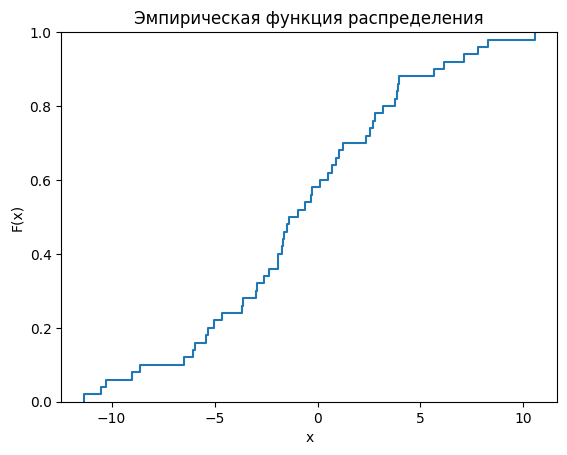

In [498]:
sns.ecdfplot(data_2) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

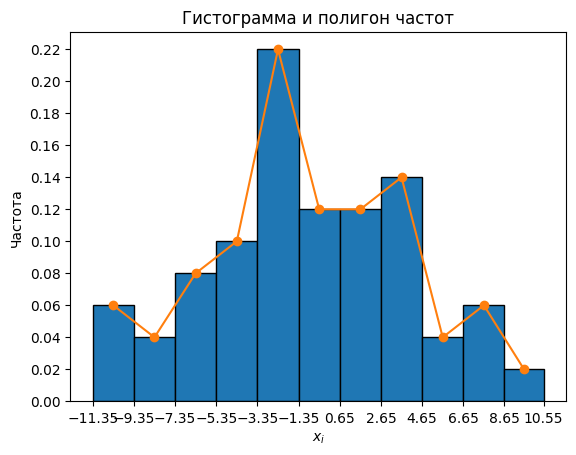

In [499]:
#гистограмма и полигон частот частот

h = 2
bins = [-11.35, -9.35, -7.35, -5.35, -3.35, -1.35, 0.65, 2.65, 4.65, 6.65, 8.65, 10.55]
plt.xticks(bins)

#построение гистограммы
y, edges, _= plt.hist(data_2, edgecolor='black', bins=bins, weights=np.ones_like (data_2) / n) 

 #построение полигона
midpoints = 0.5*(edges[1:] + edges[:-1])
plt.plot(midpoints, y, '-o')

plt.yticks(np.arange(0, 0.23, 0.02))
plt.xlabel('$x_i$')
plt.ylabel('Частота')
plt.title('Гистограмма и полигон частот');

### b) Вычислить выборочные аналоги следующих числовых характеристик:
* Математического ожидания;
* Дисперсии;
* СКО;
* Медианы;
* Асимметрии;
* Эксцесса;
* Вероятности $\mathbb{P}\left(X \in [c, d]\right)$. 

In [500]:
#Математическое ожидание

sum_= 0
for item in data_2:
    sum_ += item #сумма Х
mn = sum_/n
print("Выборочное среднее: ", round(mn, 2))

Выборочное среднее:  -0.83


Получаем выборочный аналог математического ожидания - выборочное среднее:
$$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= -0.83$$

In [501]:
#Выборочный аналог дисперсии и СКО

dif=[]
for item in data_2:
    dif.append((item - mn)**2) #массив  с (X_i-X_cp)^2
S = round(sum(dif)/n, 2)

s = round(S**0.5, 2) #выборочное СКО

print("Выборочная дисперсия: ", S)
print("Выборочное СКО: ", s)

Выборочная дисперсия:  24.47
Выборочное СКО:  4.95


Получаем выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО: 
$$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=24.47$$ 
$$S=\sqrt{S^2}=4.95$$

In [502]:
#Выборочная медиана

med = stat.median(data_2)
print("25ый элемент вариационного ряда: ", data_2[24])
print("26ой элемент вариационного ряда: ", data_2[25])
print("Выборочная медиана: ", round(med, 3))

25ый элемент вариационного ряда:  -1.4
26ой элемент вариационного ряда:  -0.95
Выборочная медиана:  -1.175


Выборочная медиана: <br><br>
$$np = 50\cdot\frac{1}{2}=25\in \mathbb Z \Rightarrow \large z_{50,\frac{1}{2}} = \normalsize \left[ X_{(25)},X_{(26)} \right) = \left[-1.4, -0.95\right) \Rightarrow \large z_{50,\frac{1}{2}} \normalsize = \frac{-1.4-0.95}{2} = -1.175$$

In [503]:
#Выборочная асимметрия

dif=[]
for item in data_2:
    dif.append((item - mn)**3) #массив  с (X_i-X_cp)^3
skew_X = round(sum(dif)/(n*s**3), 4)
print("Выборочный коэффициент асимметрии: ", skew_X)

Выборочный коэффициент асимметрии:  -0.0197


Выборочный коэффициент асимметрии: 
$$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = -0.0197$$

In [504]:
#Выборочный эксцесс

dif=[]
for item in data_2:
    dif.append((item - mn)**4) ##массив  с (X_i-X_cp)^4
kurt_X = round(sum(dif)/(n*s**4) - 3, 3)
print("Выборочный коэффициент эксцесса: ", kurt_X)

Выборочный коэффициент эксцесса:  -0.297


Выборочный коэффициент эксцесса:
$$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = -0.297$$

In [505]:
#нахождение P(c <= x <= d)

c, d = -5.00, 3.00
print("F(d) = ", F(d))
print("F(c) = ", F(c))
print("Вероятность P(c <= x <= d): ", F(d) - F(c))

F(d) =  0.94
F(c) =  0.0
Вероятность P(c <= x <= d):  0.94


Выборочный аналог $\mathbb{P}\left(x \in \left[c, d\right]\right)$, c = -5.00, d = 3.00: <br><br>

$$\mathbb{P}\left(x \in \left[c, d\right]\right) = \mathrm{F}(d) - \mathrm{F}(c) = 0.78 - 0.22 = 0.56$$
 где $\mathrm{F}(x)$ - эмпирическая функция распределения

### c) В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить оценку максимального правдоподобия параметров $\left(a, \sigma^2 \right)$ и соответствующие оценки по методу моментов. Найти смещение оценок.

**Плотность нормального распределения:** 
$$p_{\theta}(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp{\left(-\frac{(x - a)^2}{2\sigma^2}\right)}$$

* **Оценка максимального правдоподобия:** <br>

$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = \left(2\pi \right)^{-\frac{n}{2}} \cdot \sigma^{-n} \cdot \exp{\left(-\frac{1}{2\sigma^2} \sum \limits_{i = 1}^n (x_i - a)^2\right)}$ <br>

$\mathrm{LL}\left(\vec{X}, \vec{\theta}\right) = -\frac{n}{2} \ln{2\pi} - n\ln{\sigma} - \frac{1}{2\sigma^2}\sum \limits_{i = 1}^n (x_i - a)^2$ <br>

Для параметра $a$: <br>

$\frac{\partial \mathrm{LL}}{ \partial a} = \frac{1}{\sigma^2} \cdot \normalsize \left(\sum \limits_{i = 1}^n x_i - na\right) = 0$ , $\Rightarrow \widehat{a} = \overline{X}$ <br>

Для параметра $\sigma^2$: <br>

$\frac{\partial \mathrm{LL}}{ \partial \sigma} = -\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum \limits_{i = 1}^n (x_i - a)^2 = 0$ , $\Rightarrow \widehat{\sigma^2} = S^2$ <br>

Значит, $\widehat{\theta} = \left(\widehat{a}, \widehat{\sigma^2}\right) = \left(\overline{X}, S^2\right)$ - ОМП <br>

* **Оценка методом моментов:** 

$\mathbb{E}X_1 = a$ , $M_1 = \overline{X}$ <br>
$\mathbb{E}X_1^2 = a^2 + \sigma^2$ , $M_2 = \overline{X^2}$

Система уравнений метода моментов:
 $\begin{equation} \begin{cases} \overline{X} = a \\ \overline{X^2} = a^2 + \sigma^2 \end{cases}\end{equation}$ <br>

Следовательно, $\widetilde{\theta} = \left(\widetilde{a}, \widetilde{\sigma^2}\right) = \left(\overline{X}, S^2\right)$ - ОММ <br>

* **Смещение оценок:**

$\mathbb{E}_{\theta}\widehat{a} = \mathbb{E}_{\theta}\widetilde{a} = \mathbb{E}_{\theta}\overline{X} = \frac{1}{n} \sum \limits_{i = 1}^n\mathbb{E}_{\theta}X_1 = \frac{1}{n} \cdot n \cdot a = a$ , следовательно оценки параметра $a$ несмещённые. <br>

$\mathbb{E}_{\theta}\widehat{\sigma^2} = \mathbb{E}_{\theta}\widetilde{\sigma^2} = \mathbb{E}_{\theta}S^2 = \frac{1}{n}\mathbb{E}_{\theta}\sum \limits_{i = 1}^n \left(X_i - \overline{X}\right)^2 = \left[\begin{array}{l l} X_i - \mathbb{E}_{\theta}X_i = Y_i \\ \mathbb{E}_{\theta}Y_i = 0 \\ \mathbb{D}_{\theta} = \sigma^2 \end{array} \right] = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i = 1}^n \left(Y_i - \overline{Y}\right)^2 = \mathbb{E}_{\theta}\overline{Y^2} - \mathbb{E}_{\theta}\overline{Y}^2$ <br>

Посчитаем отдельно $\mathbb{E}_{\theta}\overline{Y^2}$ и $\mathbb{E}_{\theta}\overline{Y}^2$: <br>

$\mathbb{E}_{\theta}\overline{Y^2} = \frac{1}{n} \sum \limits_{i = 1}^n\mathbb{E}_{\theta}Y_1^2 = \frac{1}{n} \cdot n \cdot \sigma^2 = \sigma^2$

$\mathbb{E}_{\theta}\overline{Y}^2 = \frac{1}{n^2}\sum \limits_{i = 1}^n \sum \limits_{j = 1}^n \mathbb{E}_{\theta}Y_iY_j = \left[\begin{array}{l l} i = j: \mathbb{E}_{\theta}Y_i^2 = \sigma^2 \\ i \neq j: \mathbb{E}_{\theta}Y_i\mathbb{E}_{\theta}Y_j = 0 \end{array} \right] = \frac{1}{n^2} \left(n \cdot \sigma^2 + \left(n^2 - n\right) \cdot 0\right) = \frac{\sigma^2}{n}$ <br> 

Тогда $\mathbb{E}_{\theta}S^2 = \sigma^2 - \frac{\sigma^2}{n} = \frac{n - 1}{n}\sigma^2$, следовательно оценки параметра $\sigma^2$ смещённые.

### d) Построить доверительные интервалы уровня значимости $\alpha_2 = 0.05$ для параметров $\left(a, \sigma^2\right)$.

* $\theta = a$

По пункту 4 леммы Фишера:

$\mathrm{G}\left(\vec{X}, a\right) = \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S} \sim \mathrm{Student}(n - 1)$ - генератор.

Выбор квантилей:

$x_{\alpha}: \mathrm{S}_{n-1}(x_{\alpha}) = 1 - \frac{\alpha}{2}  = 1 - \frac{0.05}{2} = 0.975 \Rightarrow x_{\alpha} = 2 \Rightarrow x_{2\alpha} = x_{\alpha} = 2, x_{1\alpha} = -x_{\alpha} = -2$ , так как распределение Стьюдента симметричное.

$\mathbb{P}_{\theta}\left(-x_{\alpha} \le \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S} \le x_{\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X} \le a \le \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right) = 1 - \alpha$

Таким образом, доверительный интервал:

$$\left[-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}, \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right] \ni a$$
$$\left[-2.26, 0.59\right] \ni a$$

* $\theta = \sigma^2$

По пункту 3 леммы Фишера:

$\mathrm{G}\left(\vec{X}, \sigma^2\right) = \frac{nS^2}{\sigma^2} \sim \chi^2_{n-1}$ - генератор.

Выбор квантилей:

$x_{1\alpha}: \mathrm{K}_{n-1}(x_{1\alpha}) = \frac{\alpha}{2} = \frac{0.05}{2} = 0.025 \Rightarrow x_{1\alpha} = 31.56$

$x_{2\alpha}: \mathrm{K}_{n-1}(x_{2\alpha}) = 1 - \frac{\alpha}{2} = 1 - 0.025 = 0.975 \Rightarrow x_{2\alpha} = 70.22$ , так как распределение несимметричное.

$\mathbb{P}_{\theta}\left(x_{1\alpha} \le \frac{nS^2}{\sigma^2} \le x_{2\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(\frac{nS^2}{x_{2\alpha}} \le \sigma^2 \le \frac{nS^2}{x_{1\alpha}}\right) = 1 - \alpha$

Таким образом, доверительный интервал:

$$\left[\frac{nS^2}{x_{2\alpha}}, \frac{nS^2}{x_{1\alpha}}\right] \ni \sigma^2$$
$$\left[17.42, 38.77\right] \ni \sigma^2$$



In [506]:
#доверительный интервал для а
alpha_2 = 0.05
df = n - 1
x_alpha = t.ppf(1 - alpha_2/2, df)
print(x_alpha)
left_a = -(x_alpha * s)/(n - 1)**0.5 + mn
right_a = (x_alpha * s)/(n - 1)**0.5 + mn

print('Доверительный интервал для параметра а: ', [round(left_a, 2), round(right_a, 2)])

#доверительный интервал для сигмы

x_1alpha = chi2.ppf(alpha_2 / 2, df) #подсчёт квантилей 
print(x_1alpha)
x_2alpha = chi2.ppf(1 - alpha_2 / 2, df)
#print(x_1alpha)
#print(x_2alpha)
left_sigma = (n*S)/x_2alpha
right_sigma = (n*S)/x_1alpha
print('Доверительный интервал для параметра sigma^2 : ', [round(left_sigma, 2), round(right_sigma, 2)])

2.009575234489209
Доверительный интервал для параметра а:  [-2.26, 0.59]
31.55491646266713
Доверительный интервал для параметра sigma^2 :  [17.42, 38.77]


### e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с нормальным распределением с параметрами $(a_0, \sigma_0^2) = (-1.00, 5.00)$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.05$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Вычислим выборочный критерий Колмогорова $\eta = \sqrt{n}D_n$ используя Scipy

In [507]:
X = data_2
a = -1.00
D = 5.00
sigma = np.sqrt(D)
n = len(X)

cdf = lambda x: norm.cdf(x, loc = a, scale = sigma)
Dn, _ = kstest(X, cdf)
eta = n**0.5 * Dn
print('Критерий Колмогорова: ', round(eta, 2))

Критерий Колмогорова:  1.65


Зададим уровень значимости $\alpha = 0.05$. Вычислим квантиль Колмогорова $d_{1 - \alpha}$, чтобы построить критическую область $V_k = (d_{1 - \alpha},+ \infty)$

In [508]:
alpha = 0.05
d = kstwobign.ppf(1 - alpha)
print('Квантиль: ', round(d, 2))

Квантиль:  1.36


$V_k = (1.36, + \infty)$

$\eta \in V_k \Rightarrow$ гипотеза отвергается.

In [509]:
while eta > d:
    alpha -= 0.001
    d = kstwobign.ppf(1 - alpha)

print('Наибольшее значение уровня значимости, при котором нет оснований отвергнуть гипотезу: ', round(alpha, 3))

Наибольшее значение уровня значимости, при котором нет оснований отвергнуть гипотезу:  0.008


### f) Используя гистограмму частот, построить критерии значимости $\chi^2$ проверки простой гипотезы согласия с нормальным распределением с параметрами $(a_0, \sigma_0^2) = (-1.00, 25)$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.05$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Разобьём числовую прямую на отрезки $G_1 = \left(- \infty, -3\right],  G_2 = \left(-3, -0.63\right],  G_3 = \left(-0.63, 1.02\right], G_4 = \left(1.02, +\infty \right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x) = \frac{1}{\sqrt{2\pi}\sigma} \mathrm{exp}\left(-\frac{(x - a)^2}{2\sigma^2}\right) = \frac{1}{\sqrt{50 \cdot \pi}} \mathrm{exp}\left(-\frac{(x + 1)^2}{50}\right)$ - плотность нормального распределения.<br>
$\mathbb{P}_{1} = 0.35 \rightarrow n\mathbb{P}_1 = 17.23$ 

$\mathbb{P}_{2} = 0.18 \rightarrow n\mathbb{P}_2 = 9.25$

$\mathbb{P}_{3} = 0.13 \rightarrow n\mathbb{P} _3 = 6.37$

$\mathbb{P}_{4} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 \right) = 0.34 \rightarrow n\mathbb{P}_4 = 17.16$

Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^4 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 1.25$<br><br>
Из таблицы (дополнительно посчитано в коде): $\chi_{k-1, \alpha_2}^2 = \chi_{3, 0.05}^2 = 7.81$ <br><br>
Так как $\chi^2 < \chi_{3, 0.05}^2$ , то гипотезу принимаем.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.742$.

In [510]:
a = -1
sigma = 5
alpha_2 = 0.05

edges = [-3.0, -0.63, 1.02, 10.55] #интервалы

#подсчёт вероятностей
p1 = norm.cdf(edges[0], a, sigma)
p2 = norm.cdf(edges[1], a, sigma) - norm.cdf(edges[0], a, sigma)
p3 = norm.cdf(edges[2], a, sigma) - norm.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)

#количество значений, попавших в интервал
groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Статистика критерия: ", round(chi, 2))
print('Табличное значение:', round(chi2.ppf(1 - alpha_2, 3), 2))

if chi > chi2.ppf(1 - alpha_2, 3):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.05
step = 0.001
while chi < chi2.ppf(1 - alpha, 3):
    alpha += step
print('Наибольший уровень значимости: ', round(alpha, 5))

P1 =  0.3445782583896758 , n*P1 =  17.22891291948379
P2 =  0.18491654897922716 , n*P2 =  9.245827448961357
P3 =  0.12739883304295407 , n*P3 =  6.369941652147704
P4 =  0.34310635958814295 , n*P4 =  17.155317979407148
n1 =  15 , n2 =  12 , n3 =  7 , n4 =  16
Статистика критерия:  1.25
Табличное значение: 7.81
Гипотеза принимается
Наибольший уровень значимости:  0.742


### g) Построить критерий проверки значимости $\chi^2$ сложной гипотезы согласия с нормальным распределением. Проверить гипотезу на уровне значимости $\alpha_2 = 0.05$. Вычислить наибольшее значение уровня значимости, на которос ещё нет оснований отвергнуть данную гипотезу.

Проведём группировку значений, как в предыдущем пункте.

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp{\left(-\frac{(x - a)^2}{2\sigma^2}\right)}$ - плотность нормального распределения.<br>

Вместо параметров возьмём их оценки: $a = \overline{X} = -0.83$ , $\sigma^2 = S^2 = 24.47$. Тогда $p_{\theta}(x) = \frac{1}{\sqrt{9.9\pi}} \exp{\left(-\frac{(x + 0.83)^2}{48.94}\right)}$

$\mathbb{P}_{1} = 0.33 \rightarrow n\mathbb{P}_1 = 16.54$ 

$\mathbb{P}_{2} = 0.19 \rightarrow n\mathbb{P}_2 = 9.28$

$\mathbb{P}_{3} = 0.13  \rightarrow n\mathbb{P} _3 = 6.48$

$\mathbb{P}_{4} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 \right) = 0.35 \rightarrow n\mathbb{P}_4 = 17.7$

Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^4 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 1.15$

Из таблицы (дополнительно посчитано в коде): $\chi_{k-1-r, \alpha_2}^2 = \chi_{1, 0.05}^2 = 3.84$ 

Так как $\chi^2 < \chi_{1, 0.05}^2$ , то нет оснований отвергнуть гипотезу. 

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.28$.

In [511]:
a = mn
sigma = s
alpha_2 = 0.05

edges = [-3.0, -0.63, 1.02, 10.55] #интервалы

#подсчёт вероятностей
p1 = norm.cdf(edges[0], a, sigma)
p2 = norm.cdf(edges[1], a, sigma) - norm.cdf(edges[0], a, sigma)
p3 = norm.cdf(edges[2], a, sigma) - norm.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)

#количество значений, попавших в интервал
groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_2, 1))

if chi > chi2.ppf(1 - alpha_2, 1):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.05
step = 0.0001
while chi < chi2.ppf(1 - alpha, 1):
    alpha += step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.3308615713409139 , n*P1 =  16.543078567045693
P2 =  0.18559113856635878 , n*P2 =  9.27955692831794
P3 =  0.1295630442164244 , n*P3 =  6.47815221082122
P4 =  0.35398424587630295 , n*P4 =  17.699212293815147
n1 =  15 , n2 =  12 , n3 =  7 , n4 =  16
Статистика критерия:  1.146642289299461
Табличное значение: 3.841458820694124
Гипотеза принимается
Наибольший уровень значимости:  0.2842999999999846


### h) Построить наиболее мощный критерий проверки простой гипотезы о нормальности с параметром $\left(a, \sigma^2\right) = \left(a_0, \sigma_0^2\right) = \left(-1.00, 25\right)$ при альтернативе нормальности с параметром $\left(a, \sigma^2\right) = \left(a_1, \sigma_1^2\right) = \left(15, 25\right)$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.05$. Что получится, если поменять местами основновную и альтернативную гипотезы?

*Нулевая гипотеза* $H_0: \theta_0 = \left( a_0, \sigma^2_0\right) = (-1, 25)$

*Альтернативная гипотеза* $H_1: \theta_1 = \left( a_1, \sigma^2_1\right) = (15, 25)$

*Функция правдоподобия:*

$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = \left(2\pi \right)^{-\frac{n}{2}} \cdot \sigma^{-n} \cdot \exp{\left(-\frac{1}{2\sigma^2} \sum \limits_{i = 1}^n (x_i - a)^2\right)}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \vec{\theta_0}, \vec{\theta_1}\right) = \frac{\mathrm{L}\left(\vec{X}, \vec{\theta_1}\right)}{\mathrm{L}\left(\vec{X}, \vec{\theta_0}\right)} = \exp{\left(\frac{n}{2\sigma^2}\left(a_0^2 - a_1^2\right) + \frac{1}{\sigma^2}\sum \limits_{i = 1}^n x_i \cdot \left(a_1 - a_0\right)\right)}$ - монотонно возрастающая функция от $\sum \limits_{i = 1}^n x_i$. Здесь $\sigma = \sigma_0 = \sigma_1 = 5$

$\frac{n}{2\sigma^2}\left(a_0^2 - a_1^2\right) + \frac{1}{\sigma^2}\sum \limits_{i = 1}^n x_i \cdot \left(a_1 - a_0\right) > \ln{c}$

$\overline{X} > \large \frac{2\sigma^2\ln{c} - n\left(a_0^2 - a_1^2\right)}{2n\left(a_1 - a_0\right)}$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} > c^*$

$\mathrm{LR} < c \iff \overline{X} < c^*$

Тогда:

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} < c^*\\ \end{array}\right.$$
  
Используя ЦПТ, получается эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - a_0}{\sigma} \sim \mathcal{N}(0, 1)$ при $H_0$

$\sqrt{n} \frac{\overline{X} - a_0}{\sigma} = 0.24$

Квантиль:

$c^* : \Phi(c^*) = 1 - \alpha_2 = 1 - 0.05 = 0.95 \Rightarrow c^* = 1.65$

Тогда:
$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > 1.65 \\ p, \overline{X} = 1.65 \\ 0, \overline{X} < 1.65\\ \end{array}\right.$$
Так как $\sqrt{n} \frac{\overline{X} - a_0}{\sigma} < c^*$, то нет оснований отвергнуть гипотезу.

In [512]:
c_alpha = 0
while norm.cdf(c_alpha) <= 0.95:
    c_alpha += 0.01
print('c* =', c_alpha)

a_0 = -1
clt = ((mn - a_0)/sigma) * n**0.5
print('LR =', clt)

c* = 1.6500000000000012
LR = 0.23684505923379737


**Поменяем местамим основную и альтернативную гипотезы:**

*Нулевая гипотеза* $H_0: \theta_0 = \left( a_1, \sigma^2_1\right) = (15, 25)$

*Альтернативная гипотеза* $H_1: \theta_1 = \left( a_0, \sigma^2_0\right) = (-1, 25)$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \vec{\theta_0}, \vec{\theta_1}\right) = \frac{\mathrm{L}\left(\vec{X}, \vec{\theta_1}\right)}{\mathrm{L}\left(\vec{X}, \vec{\theta_0}\right)} = \exp{\left(\frac{n}{2\sigma^2}\left(a_1^2 - a_0^2\right) + \frac{1}{\sigma^2}\sum \limits_{i = 1}^n x_i \cdot \left(a_0 - a_1\right)\right)}$ - монотонная функция от $\sum \limits_{i = 1}^n x_i$. Здесь $\sigma = \sigma_0 = \sigma_1 = 5$

$\frac{n}{2\sigma^2}\left(a_1^2 - a_0^2\right) + \frac{1}{\sigma^2}\sum \limits_{i = 1}^n x_i \cdot \left(a_0 - a_1\right) > \ln{c}$

Так как $a_0 < a_1$, то меняем знак неравенства:

$\overline{X} > \large \frac{2\sigma^2\ln{c} - n\left(a_1^2 - a_0^2\right)}{2n\left(a_0 - a_1\right)}$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} < c^*$

$\mathrm{LR} < c \iff \overline{X} > c^*$

Тогда получим:
$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} > c^*\\ \end{array}\right.$$
  
Используя ЦПТ, получаем эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - a_1}{\sigma} \sim \mathcal{N}(0, 1)$ при $H_1$

$\mathbb{P}\left(\sqrt{n}\frac{\overline{X} - a_1}{\sigma} \geq \sqrt{n}\frac{c^* - a_1}{\sigma}\right) = 1 - \Phi\left(\sqrt{n}\frac{c^* - a_1}{\sigma}\right) = \alpha_2$

$\sqrt{n}\frac{c^* - a_1}{\sigma} = x_{\alpha}$

$x_{\alpha} : \Phi(x_{\alpha}) = 1 - \alpha_2 = 1 - 0.05 = 0.95 \Rightarrow x_{\alpha} = 1.65 \Rightarrow c^* = 16.17$

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < 16.17 \\ p, \overline{X} = 16.17 \\ 0, \overline{X} > 16.17\\ \end{array}\right.$$

$\overline{X} = -0.83$

Так как $\overline{X} < c^*$, то гипотеза отвергается.

In [513]:
x_alpha = 0
while norm.cdf(x_alpha) <= 0.95:
    x_alpha += 0.01
print('x_alpha =', x_alpha)

sigma = 5
a_1 = 15
c_star = (x_alpha * sigma)/n**0.5 + a_1
print('c =', c_star)

x_alpha = 1.6500000000000012
c = 16.166726188957803


### i) В пунктах (c) - (g) заменить семейство нормальных распределенеий на двухпараметрическое семейство распределений Лапласа с плотностями:
$$p_{a, \sigma}(x) = \frac{1}{\sqrt{2}\sigma} \exp{\left(-\frac{\sqrt{2}}{\sigma} \left| x - a\right|\right)}$$

#### i.c)

* Оценка максимального правдоподобия:

$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = 2^{-\frac{n}{2}} \sigma^{-n} \exp\left(-\frac{\sqrt{2}}{\sigma} \sum \limits_{i = 1}^{n} |x_i - a|\right)$

$\mathrm{LL}\left(\vec{X}, \vec{\theta}\right) = -\frac{n}{2}\ln{2} - n\ln{\sigma} - \frac{\sqrt{2}}{\sigma}\sum \limits_{i = 1}^{n} |x_i - a|$

$\frac{\partial\mathrm{LL}}{\partial \sigma} = -\frac{n}{\sigma} + \frac{\sqrt{2}}{\sigma^2}\sum \limits_{i = 1}^{n} |x_i - \widehat{a}| = 0 \Rightarrow \widehat{\sigma}^2 = \frac{2}{n^2}\left(\sum \limits_{i = 1}^{n} |x_i - \widehat{a}|\right)^2$ - ОМП параметра $\sigma^2$

$\frac{\partial\mathrm{LL}}{\partial a} = -\Large\frac{\sqrt{2}}{\widehat{\sigma}} \normalsize \sum \limits_{i = 1}^n \mathrm{sgn}\left(x_i - a\right) = 0$

Так как $\frac{\partial\mathrm{LL}}{\partial a}$ - монотонно убывающая функция, то ОМП параметра а - выборочная медиана.

$\widehat{a} = z_{n, \frac{1}{2}} = \begin{cases} X_{\lfloor \frac{n}{2} \rfloor + 1} , np \in \mathbb{Z} \\ \\ \left[X_{\left(\frac{n}{2}\right)}, X_{\left(\frac{n}{2} + 1\right)}\right), np \notin \mathbb{Z} \end{cases}$

Таким образом $\widehat{\theta} = \left(\widehat{a}, \widehat{\sigma}^2 \right)$

* Оценка методом моментов:

$\mathbb{E}x = a$ , $\mathrm{M}_1 = \overline{X}$

$\mathbb{E}x^2 = \sigma^2 + a^2$, $\mathrm{M}_2 = \overline{X^2}$

Система уравнений метода моментов:
 $\begin{equation} \begin{cases} \overline{X} = a \\ \overline{X^2} = a^2 + \sigma^2 \end{cases}\end{equation}$

Следовательно, $\widetilde{\theta} = \left(\widetilde{a}, \widetilde{\sigma^2}\right) = \left(\overline{X}, S^2\right)$ - ОММ

* Смещение оценок:

$\mathbb{E}_{\theta} \widehat{a} = \mathbb{E}_{\theta}z_{n, \frac{1}{2}} = \mathbb{E} \frac{X_{\frac{n}{2}} + X_{\frac{n}{2} + 1}}{2} = a \rightarrow$ несмещённая.

$\mathbb{E}_{\theta} \widehat{\sigma^2} \neq \sigma^2 \rightarrow$ смещённая оценка.

$\mathbb{E}_{\theta} \widetilde{a} = \mathbb{E}_{\theta} \overline{X} = a \rightarrow$ несмещённая оценка.

$\mathbb{E}_{\theta}\widetilde{\sigma^2} = \mathbb{E}_{\theta} S^2 = \frac{n -1}{n} \sigma^2 \rightarrow$ смещённая оценка.

#### **i.d) $\alpha_2$ = 0.05**

По пункту 4 леммы Фишера:

$\mathrm{G}\left(\vec{X}, a\right) = \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S} \sim \mathrm{Student}(n - 1)$ - генератор.

Выбор квантилей:

$x_{\alpha}: \mathrm{S}_{n-1}(x_{\alpha}) = 1 - \frac{\alpha}{2}  = 1 - \frac{0.05}{2} = 0.975 \Rightarrow x_{\alpha} = 2 \Rightarrow x_{2\alpha} = x_{\alpha} = 2, x_{1\alpha} = -x_{\alpha} = -2$ , так как распределение Стьюдента симметричное.

$\mathbb{P}_{\theta}\left(-x_{\alpha} \le \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S} \le x_{\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X} \le a \le \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right) = 1 - \alpha$

Таким образом, доверительный интервал:

$$\left[-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}, \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right] \ni a$$
$$\left[-2.26, 0.59\right] \ni a$$

По пункту 3 леммы Фишера:

$\mathrm{G}\left(\vec{X}, \sigma^2\right) = \frac{nS^2}{\sigma^2} \sim \chi^2_{n-1}$ - генератор.

Выбор квантилей:

$x_{1\alpha}: \mathrm{K}_{n-1}(x_{1\alpha}) = \frac{\alpha}{2} = \frac{0.05}{2} = 0.025 \Rightarrow x_{1\alpha} = 31.56$

$x_{2\alpha}: \mathrm{K}_{n-1}(x_{2\alpha}) = 1 - \frac{\alpha}{2} = 1 - 0.025 = 0.975 \Rightarrow x_{2\alpha} = 70.22$ , так как распределение несимметричное.

$\mathbb{P}_{\theta}\left(x_{1\alpha} \le \frac{nS^2}{\sigma^2} \le x_{2\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(\frac{nS^2}{x_{2\alpha}} \le \sigma^2 \le \frac{nS^2}{x_{1\alpha}}\right) = 1 - \alpha$

Таким образом, доверительный интервал:

$$\left[\frac{nS^2}{x_{2\alpha}}, \frac{nS^2}{x_{1\alpha}}\right] \ni \sigma^2$$
$$\left[17.42, 38.77\right] \ni \sigma^2$$


In [514]:
#доверительный интервал для а
alpha_2 = 0.05
df = n - 1

x_alpha = t.ppf(1 - alpha_2/2, df)
print('x_alpha =', x_alpha)
left_a = -(x_alpha * s)/(n - 1)**0.5 + mn
right_a = (x_alpha * s)/(n - 1)**0.5 + mn

print('Доверительный интервал для параметра а: ', [round(left_a, 2), round(right_a, 2)])

#доверительный интервал для сигмы
x_1alpha = chi2.ppf(alpha_2 / 2, df) #подсчёт квантилей 
x_2alpha = chi2.ppf(1 - alpha_2 / 2, df)
#print(x_1alpha)
#print(x_2alpha)
left_sigma = (n*S)/x_2alpha
right_sigma = (n*S)/x_1alpha
print('Доверительный интервал для параметра sigma^2 : ', [round(left_sigma, 2), round(right_sigma, 2)])

x_alpha = 2.009575234489209
Доверительный интервал для параметра а:  [-2.26, 0.59]
Доверительный интервал для параметра sigma^2 :  [17.42, 38.77]


#### i.e)

Вычислим выборочный критерий Колмогорова $\eta = \sqrt{n}D_n = 1.33$

Зададим уровень значимости $\alpha = 0.05$. Вычислим квантиль Колмогорова $d_{1 - \alpha}$, чтобы построить критическую область $V_k = (d_{1 - \alpha},+ \infty) = (1.36,+ \infty)$

Так как $\eta \notin V_k \Rightarrow$ гипотеза принимается.

Наибольший уровень значимости, при котором ещё нет оснований отвергнуть гипотезу: $\alpha = 0.058$

In [515]:
a = -1.00
D = 5.00
sigma = np.sqrt(D)

#Критерий Колмогорова   
cdf = lambda x: laplace.cdf(x, loc = a, scale = sigma)
Dn, _ = kstest(data_2, cdf)
eta = n**0.5 * Dn
print('Критерий Колмогорова: ', round(eta, 2))

#Квантиль
alpha = 0.05
d = kstwobign.ppf(1 - alpha)
print('Квантиль: ', round(d, 2))

#наибольший уровень значимости
while eta < d:
    alpha += 0.001
    d = kstwobign.ppf(1 - alpha)
print('Наибольшее значение уровня значимости, при котором нет оснований отвергнуть гипотезу: ', round(alpha, 3))

Критерий Колмогорова:  1.33
Квантиль:  1.36
Наибольшее значение уровня значимости, при котором нет оснований отвергнуть гипотезу:  0.058


#### i.f) $a_0 = -1.00, \sigma_0 = 5, \alpha_2 = 0.05$

Проведём группировку значений $x_i$ : $G_1 = \left(- \infty, -3\right],  G_2 = \left(-3, -0.63\right],  G_3 = \left(-0.63, 1.02\right], G_4 = \left(1.02, \infty \right]$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x) = \frac{1}{\sqrt{2}\sigma} \exp{\left(-\frac{\sqrt{2}}{\sigma} \left| x - a\right|\right)} = \frac{1}{5 \cdot \sqrt{2}} \exp{\left(-\frac{\sqrt{2}}{5} \left| x + 1\right|\right)}$ - плотность распределения Лапласа.<br>
$\mathbb{P}_{1} = 0.34 \rightarrow n\mathbb{P}_1 = 16.76$ 

$\mathbb{P}_{2} = 0.2 \rightarrow n\mathbb{P}_2 = 10.03$

$\mathbb{P}_{3} = 0.13 \rightarrow n\mathbb{P} _3 = 6.53$

$\mathbb{P}_{4} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 \right) = 0.33 \rightarrow n\mathbb{P}_4 = 16.69$

Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^4 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 0.64$<br><br>
Из таблицы (дополнительно посчитано в коде): $\chi_{k-1, \alpha_2}^2 = \chi_{3, 0.05}^2 = 7.81$ <br><br>
Так как $\chi^2 < \chi_{3, 0.05}^2$ , то нет оснований отвергнуть гипотезу. <br><br>

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.889$.


In [516]:
a = -1
sigma = 5
alpha_2 = 0.05

edges = [-3.0, -0.63, 1.02, 10.55] #интервалы

#подсчёт вероятностей
p1 = laplace.cdf(edges[0], a, sigma)
p2 = laplace.cdf(edges[1], a, sigma) - laplace.cdf(edges[0], a, sigma)
p3 = laplace.cdf(edges[2], a, sigma) - laplace.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)

#количество значений, попавших в интервал
groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Статистика критерия: ", round(chi, 2))
print('Табличное значение:', round(chi2.ppf(1 - alpha_2, 3), 2))

if chi > chi2.ppf(1 - alpha_2, 3):
    print('Гипотеза отвергается')

#наибольший уровень значимости
alpha = 0.05
step = 0.001
while chi < chi2.ppf(1 - alpha, 3):
    alpha += step
print('Наибольший уровень значимости: ', round(alpha, 5))

P1 =  0.33516002301781966 , n*P1 =  16.758001150890983
P2 =  0.20050413006153678 , n*P2 =  10.02520650307684
P3 =  0.13051378628617916 , n*P3 =  6.525689314308957
P4 =  0.3338220606344644 , n*P4 =  16.69110303172322
n1 =  15 , n2 =  12 , n3 =  7 , n4 =  16
Статистика критерия:  0.64
Табличное значение: 7.81
Наибольший уровень значимости:  0.889


#### i.g) $\alpha_2 = 0.05$

Проведём группировку значений $x_i$ : $G_1 = \left(- \infty, -3\right],  G_2 = \left(-3, -0.63\right],  G_3 = \left(-0.63, 2.57\right], G_4 = \left(2.57, \infty \right]$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x) = \frac{1}{\sqrt{2}\sigma} \exp{\left(-\frac{\sqrt{2}}{\sigma} \left| x - a\right|\right)}$ - плотность распределения Лапласа.<br>

В качестве параметров возьмём их оценки: $a = z_{n, \frac{1}{2}} = -1.175, \sigma^2 = \frac{2}{n^2} \left(\sum \limits_{i = 1}^n |x_i + 1.175|\right)^2$

$\mathbb{P}_{1} = 0.36 \rightarrow n\mathbb{P}_1 = 17.97$ 

$\mathbb{P}_{2} = 0.19 \rightarrow n\mathbb{P}_2 = 9.38$

$\mathbb{P}_{3} = 0.2 \rightarrow n\mathbb{P} _3 = 9.96$

$\mathbb{P}_{4} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 \right) = 0.25 \rightarrow n\mathbb{P}_4 = 12.7$

Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^4 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 1.23$<br><br>
Из таблицы (дополнительно посчитано в коде): $\chi_{k-1-r, \alpha_2}^2 = \chi_{1, 0.05}^2 = 3.84$ <br><br>
Так как $\chi^2 < \chi_{1, 0.05}^2$ , то нет оснований отвергнуть гипотезу. <br><br>

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.27$.

In [517]:
a = -1.175
sum_abs = 0
for item in data_2:
    sum_abs += abs(item + 1.175)
sigma = (2**0.5/n) * sum_abs
alpha_2 = 0.05

edges = [-3.0, -0.63, 2.57, 10.55] #интервалы

#подсчёт вероятностей
p1 = laplace.cdf(edges[0], a, sigma)
p2 = laplace.cdf(edges[1], a, sigma) - laplace.cdf(edges[0], a, sigma)
p3 = laplace.cdf(edges[2], a, sigma) - laplace.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)

#количество значений, попавших в интервал
groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_2, 1))

if chi > chi2.ppf(1 - alpha_2, 1):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.05
step = 0.0001
while chi < chi2.ppf(1 - alpha, 1):
    alpha += step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.35941590233854004 , n*P1 =  17.970795116927
P2 =  0.18752527656480578 , n*P2 =  9.376263828240289
P3 =  0.19910115016091512 , n*P3 =  9.955057508045757
P4 =  0.25395767093573907 , n*P4 =  12.697883546786953
n1 =  15 , n2 =  12 , n3 =  10 , n4 =  13
Статистика критерия:  1.2326937457421603
Табличное значение: 3.841458820694124
Гипотеза принимается
Наибольший уровень значимости:  0.26689999999998654


## Выводы
В данной практической работе были преобретены навыки работы с методами математической статистики для решения задач статистического анализа. Так же изучены и применены встроенные методы среды программирования Python для реализации необходимых методов.

Была проведа статистическая обработка данных: найдены выборочные аналоги числовых характеристик, построены ОМП и ОММ оценки, доверительные интервалы, проведена работа с гипотезами.

Были проблемы с нахождением наиболее мощного критерия и проверкой гипотез.